In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [195]:
import pickle as pkl

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
from datetime import timedelta

In [4]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import pipeline, preprocessing

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.metrics import precision_recall_curve

In [14]:
from sklearn.metrics import average_precision_score

In [15]:
from sklearn.metrics import recall_score

In [16]:
df=pd.read_csv('start-up.csv',index_col=0 )

In [17]:
df.columns

Index(['permalink', 'company_name', 'category_code', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'ave_inf_y',
       'adj_base2018', 'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj'],
      dtype='object')

In [18]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + sa_funded_daysop + sa_raised_amount_usd_adj
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + cr_funded_daysop + cr_raised_amount_usd_adj''',data=df,return_type='dataframe')

In [19]:
X1=X1.drop(columns='Intercept')

In [20]:
X1


category_code[T.analytics]  category_code[T.automotive]  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            1.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   
5                            0.0                          0.0   
6                            0.0                          0.0   
7                            0.0                          0.0   
8                            0.0                          0.0   
9                            0.0                          0.0   
10                           0.0                          0.0   
11                           0.0                          0.0   
12                           0.0                          0.0   
13                           0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   
16                           0.0                          0.0   
17                           0.0                          0.0   
18                           0.0                          0.0   
19                           0.0                          0.0   
20                           0.0                          0.0   
21                           0.0                          0.0   
22                           0.0                          0.0   
23                           0.0                          0.0   
24                           0.0                          0.0   
25                           0.0                          0.0   
26                           0.0                          0.0   
27                           0.0                          0.0   
28                           0.0                          0.0   
29                           0.0                          0.0   
...                          ...                          ...   
8018                         0.0                          0.0   
8019                         0.0                          0.0   
8020                         0.0                          0.0   
8021                         0.0                          0.0   
8022                         1.0                          0.0   
8023                         0.0                          0.0   
8024                         0.0                          0.0   
8025                         0.0                          0.0   
8026                         0.0                          0.0   
8027                         0.0                          0.0   
8028                         0.0                          0.0   
8029                         0.0                          0.0   
8030                         0.0                          0.0   
8031                         0.0                          0.0   
8032                         0.0                          0.0   
8033                         0.0                          0.0   
8034                         0.0                          0.0   
8035                         0.0                          0.0   
8036                         0.0                          0.0   
8037                         0.0                          0.0   
8038                         0.0                          0.0   
8039                         0.0                          0.0   
8040                         0.0                          0.0   
8041                         0.0                          0.0   
8042                         0.0                          0.0   
8043                         0.0                          0.0   
8044                         0.0                          0.0   
8045                         0.0                          0.0   
8046                         0.0                          0.0   
8047                         0.0         

In [21]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046 entries, 0 to 8047
Data columns (total 54 columns):
category_code[T.analytics]           8046 non-null float64
category_code[T.automotive]          8046 non-null float64
category_code[T.biotech]             8046 non-null float64
category_code[T.cleantech]           8046 non-null float64
category_code[T.consulting]          8046 non-null float64
category_code[T.design]              8046 non-null float64
category_code[T.ecommerce]           8046 non-null float64
category_code[T.education]           8046 non-null float64
category_code[T.enterprise]          8046 non-null float64
category_code[T.fashion]             8046 non-null float64
category_code[T.finance]             8046 non-null float64
category_code[T.games_video]         8046 non-null float64
category_code[T.hardware]            8046 non-null float64
category_code[T.health]              8046 non-null float64
category_code[T.hospitality]         8046 non-null float64
category

In [22]:
y1['status[acquired]'].sum()/len(y1)

0.12341536167039523

In [23]:
y1_ac=y1['status[acquired]']

In [24]:
##logistc regression and auc estimates

X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ac = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
    
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)

y_score1=log_ac.predict_proba(X1_train)[:,1]

fpr1_ac_train, tpr1_ac_train,_ = roc_curve(y1_ac_train, y_score1)
roc_auc1_ac_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac,roc_auc1_ac_train)

0.740748299319728 0.7618587221513956


In [25]:
y1['status[ipo]'].sum()/len(y1)

0.023738503604275416

In [26]:
y1_ipo=y1['status[ipo]']

In [27]:
## logistic regression or ipo category
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)


tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ipo = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

y_score=log_ipo.predict_proba(X1_train)[:,1]

fpr1_ipo_train, tpr1_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_train = auc(fpr1_ipo_train, tpr1_ipo_train)

print(roc_auc1_ipo,roc_auc1_ipo_train)

0.8530573248407644 0.8659427734488191


In [28]:
## logistic regression with normallized variables and calculating AUC

# log_ac_p=pipeline.Pipeline([
#     ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
#     ( 'log', LogisticRegression())
# ])

norm=preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

X1_train_n=norm.fit_transform(X1_train)

X1_test_n = norm.transform(X1_test)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }


log_ac_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ac_n.fit(X1_train_n,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac, tpr1_ac)

y_score=log_ac_n.predict_proba(X1_train_n)[:,1]

fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc1_ac_n_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac, roc_auc1_ac_n_train )

0.740748299319728 0.7618587221513956


In [29]:
## logistic regression with normallized variables and calculating AUC

log_ipo_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo_n.fit(X1_train_n,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)

y_score=log_ipo_n.predict_proba(X1_train_n)[:,1]

fpr1_ipo_n_train, tpr1_ipo_n_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_n_train = auc(fpr1_ipo_n_train, tpr1_ipo_n_train)

print(roc_auc1_ipo_n, roc_auc1_ipo_n_train)

0.8728343949044586 0.8832076793795803


In [30]:
# random forest model for AC
tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}

randomforest_ac =  GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


y_score=randomforest_ac.predict_proba(X1_train)[:,1]

fpr2_ac_train, tpr2_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc2_ac_train = auc(fpr2_ac_train, tpr2_ac_train)


In [31]:
print(roc_auc2_ac, roc_auc2_ac_train)

0.7064761904761905 0.7881418539506707


In [32]:
# random forest model for IPO

tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}
randomforest_ipo = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    

roc_auc2_ipo, roc_auc2_ipo_train 

(0.860015923566879, 0.9124795186689638)

In [33]:
# Gradient Boosting Classifier on ipo
learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ipo=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

y_score_train=GBC_ipo.predict_proba(X1_train)[:,1]
fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)

 

In [34]:
roc_auc3_ipo, roc_auc3_ipo_train 

(0.8386783439490446, 0.9158176463460252)

In [35]:
# Gradient Boosting Classifier on AC

learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ac=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

y_score_train=GBC_ac.predict_proba(X1_train)[:,1]
fpr3_ac_train, tpr3_ac_train,_ = roc_curve(y1_ac_train, y_score_train)
roc_auc3_ac_train = auc(fpr3_ac_train, tpr3_ac_train)

roc_auc3_ac, roc_auc3_ac_train 

(0.7354744897959183, 0.8299641528961329)

In [36]:
#Support vector machine on IPO

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]


SVC1_ipo=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ipo.fit(X1_train_n,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test_n)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)

y_score=SVC1_ipo.predict_proba(X1_train_n)[:,1]
fpr4_ipo_train, tpr4_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc4_ipo_train = auc(fpr4_ipo_train, tpr4_ipo_train)

roc_auc4_ipo, roc_auc4_ipo_train

(0.7010828025477708, 0.857380391661003)

In [37]:
#Support vector machine on ac

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]

SVC1_ac=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ac.fit(X1_train_n,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test_n)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

y_score=SVC1_ac.predict_proba(X1_train_n)[:,1]
fpr4_ac_train, tpr4_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc4_ac_train = auc(fpr4_ac_train, tpr4_ac_train)

roc_auc4_ac, roc_auc4_ac_train

(0.6699081632653061, 0.6843940050141212)

In [38]:
#Naive-Bayes on IPO, it does not have hyperparameters 
bayes_ipo = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ipo.fit(X1_train,y1_ipo_train)

y_score=bayes_ipo.predict_proba(X1_test)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

y_score=bayes_ipo.predict_proba(X1_train)[:,1]
fpr6_ipo_train, tpr6_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc6_ipo_train = auc(fpr6_ipo_train, tpr6_ipo_train)

roc_auc6_ipo, roc_auc6_ipo_train

(0.826608280254777, 0.7776019851744139)

In [39]:
#Naive-Bayes on ac, it does not have hyperparameters 
bayes_ac = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ac.fit(X1_train,y1_ac_train)

y_score=bayes_ac.predict_proba(X1_test)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

y_score=bayes_ac.predict_proba(X1_train)[:,1]
fpr6_ac_train, tpr6_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc6_ac_train = auc(fpr6_ac_train, tpr6_ac_train)

In [40]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)

    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [41]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [42]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [43]:
np.mean(info_b_ipo['Train auc'])

0.7888717569075887

In [44]:
np.mean(info_b_ipo['Test auc'])

0.7859358245116383

In [45]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [46]:
info_b_ac

Test auc  Train auc                    Model  \
0  0.553493   0.568120  GaussianNB(priors=None)   
1  0.547812   0.562011  GaussianNB(priors=None)   
2  0.575290   0.559572  GaussianNB(priors=None)   
3  0.560654   0.567193  GaussianNB(priors=None)   
4  0.617218   0.555203  GaussianNB(priors=None)   
5  0.562791   0.569072  GaussianNB(priors=None)   
6  0.556927   0.566814  GaussianNB(priors=None)   
7  0.540679   0.580491  GaussianNB(priors=None)   
8  0.553489   0.571533  GaussianNB(priors=None)   
9  0.567354   0.570449  GaussianNB(priors=None)   

                                            X1_train  \
0        category_code[T.analytics]  category_cod...   
1        category_code[T.analytics]  category_cod...   
2        category_code[T.analytics]  category_cod...   
3        category_code[T.analytics]  category_cod...   
4        category_code[T.analytics]  category_cod...   
5        category_code[T.analytics]  category_cod...   
6        category_code[T.analytics]  category_cod...   
7        category_code[T.analytics]  category_cod...   
8        category_code[T.analytics]  category_cod...   
9        category_code[T.analytics]  category_cod...   

                                             X1_test  \
0        category_code[T.analytics]  category_cod...   
1        category_code[T.analytics]  category_cod...   
2        category_code[T.analytics]  category_cod...   
3        category_code[T.analytics]  category_cod...   
4        category_code[T.analytics]  category_cod...   
5        category_code[T.analytics]  category_cod...   
6        category_code[T.analytics]  category_cod...   
7        category_code[T.analytics]  category_cod...   
8        category_code[T.analytics]  category_cod...   
9        category_code[T.analytics]  category_cod...   

                                            y1_train  \
0  5090    0.0
7306    1.0
3044    0.0
5985    1....   
1  6959    0.0
4979    0.0
6309    0.0
6003    1....   
2  4548    0.0
4007    0.0
7140    0.0
2928    0....   
3  2226    0.0
571     0.0
2296    0.0
1271    0....   
4  6133    1.0
5270    0.0
3903    1.0
2391    0....   
5  7139    0.0
1367    0.0
1461    0.0
6293    0....   
6  3176    0.0
526     0.0
7333    0.0
2956    0....   
7  6110    0.0
603     0.0
710     0.0
5148    0....   
8  4848    0.0
4629    0.0
3344    0.0
1996    1....   
9  5091    0.0
7482    0.0
3974    0.0
5543    0....   

                                             y1_test  
0  824     0.0
6362    1.0
4608    0.0
1018    1....  
1  1552    0.0
3797    0.0
1763    0.0
3830    1....  
2  1445    1.0
2233    0.0
4067    0.0
7567    0....  
3  1951    0.0
6170    0.0
6301    0.0
548     0....  
4  2331    0.0
6566    0.0
4131    0.0
4415    0....  
5  770     0.0
7516    0.0
5955    0.0
6658    0....  
6  146     0.0
773     0.0
4913    0.0
4139    0....  
7  1341    0.0
2444    0.0
5693    0.0
5917    0....  
8  7228    0.0
2706    0.0
1645    0.0
4571    0....  
9  2476    0.0
1257    0.0
4578    1.0
977     0....

In [47]:
np.mean(info_b_ac['Train auc'])

0.5670457618495162

In [48]:
np.mean(info_b_ac['Test auc'])

0.5635708145064934

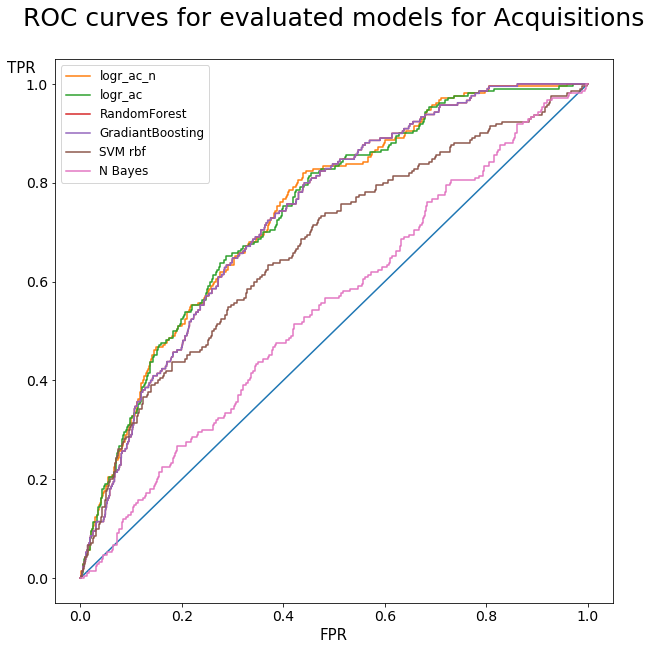

In [49]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr3_ac,tpr3_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM rbf')
plt.plot(fpr6_ac,tpr6_ac,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


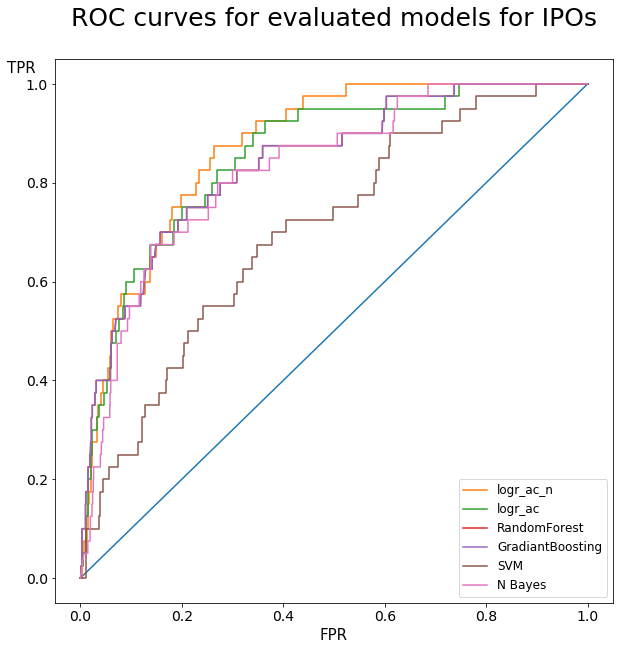

In [50]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ac_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr3_ipo,tpr3_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM')
plt.plot(fpr6_ipo,tpr6_ipo,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [51]:
Name=['logr', 'logr_n','RandomForest', 'GradiantBoosting','SVM','N Bayes']

In [52]:
Model_ac=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]

In [53]:
Model_ipo=[log_ipo,log_ipo_n,randomforest_ipo,GBC_ipo,SVC1_ipo,bayes_ipo]

In [54]:
auc_test_ac=[roc_auc1_ac,roc_auc1_ac_n, roc_auc2_ac,roc_auc3_ac,roc_auc4_ac, roc_auc6_ac]

In [55]:
auc_train_ac=[roc_auc1_ac_train, roc_auc1_ac_n_train, roc_auc2_ac_train,roc_auc3_ac_train,roc_auc4_ac_train, roc_auc6_ac_train]

In [56]:
auc_test_ipo=[roc_auc1_ipo,roc_auc1_ipo_n, roc_auc2_ipo,roc_auc3_ipo,roc_auc4_ipo, roc_auc6_ipo]

In [57]:
auc_train_ipo=[roc_auc1_ipo_train,roc_auc1_ipo_n_train, roc_auc2_ipo_train,roc_auc3_ipo_train,roc_auc4_ipo_train, roc_auc6_ipo_train]

In [58]:
fpr_ipo =[fpr1_ipo,fpr1_ipo_n,fpr2_ipo,fpr3_ipo,fpr4_ipo,fpr6_ipo]

In [59]:
fpr_ac =[fpr1_ac,fpr1_ac_n,fpr2_ac,fpr3_ac,fpr4_ac,fpr6_ac]

In [60]:
tpr_ac =[tpr1_ac,tpr1_ac_n,tpr2_ac,tpr3_ac,tpr4_ac,tpr6_ac]

In [61]:
tpr_ipo =[tpr1_ipo,tpr1_ipo_n,tpr2_ipo,tpr3_ipo,tpr4_ipo,tpr6_ipo]

In [62]:
fpr_ipo_train =[fpr1_ipo_train,fpr1_ipo_n_train,fpr2_ipo_train,fpr3_ipo_train,fpr4_ipo_train,fpr6_ipo_train]

In [63]:
fpr_ac_train =[fpr1_ac_train,fpr1_ac_n_train,fpr2_ac_train,fpr3_ac_train,fpr4_ac_train,fpr6_ac_train]

In [64]:
tpr_ipo_train =[tpr1_ipo_train,tpr1_ipo_n_train,tpr2_ipo_train,tpr3_ipo_train,tpr4_ipo_train,tpr6_ipo_train]

In [65]:
tpr_ac_train =[tpr1_ac_train,tpr1_ac_n_train,tpr2_ac_train,tpr3_ac_train,tpr4_ac_train,tpr6_ac_train]

In [66]:
Model_data_ac=pd.DataFrame({'name':Name, 'model':Model_ac,'auc_test_ac':auc_test_ac,
                            'auc_train_ac':auc_train_ac })

In [67]:
Model_data_ipo=pd.DataFrame({'name':Name, 'model':Model_ipo,'auc_test_ipo':auc_test_ipo,
                            'auc_train_ipo':auc_train_ipo})

In [68]:
Model_data_ac

name                                              model  \
0              logr  GridSearchCV(cv=3, error_score='raise',\n     ...   
1            logr_n  GridSearchCV(cv=3, error_score='raise',\n     ...   
2      RandomForest  GridSearchCV(cv=3, error_score='raise',\n     ...   
3  GradiantBoosting  GridSearchCV(cv=3, error_score='raise',\n     ...   
4               SVM  GridSearchCV(cv=3, error_score='raise',\n     ...   
5           N Bayes                            GaussianNB(priors=None)   

   auc_test_ac  auc_train_ac  
0     0.740748      0.761859  
1     0.740748      0.761859  
2     0.706476      0.788142  
3     0.735474      0.829964  
4     0.669908      0.684394  
5     0.546279      0.573396

In [69]:
Model_data_ipo

name                                              model  \
0              logr  GridSearchCV(cv=3, error_score='raise',\n     ...   
1            logr_n  GridSearchCV(cv=3, error_score='raise',\n     ...   
2      RandomForest  GridSearchCV(cv=3, error_score='raise',\n     ...   
3  GradiantBoosting  GridSearchCV(cv=3, error_score='raise',\n     ...   
4               SVM  GridSearchCV(cv=3, error_score='raise',\n     ...   
5           N Bayes                            GaussianNB(priors=None)   

   auc_test_ipo  auc_train_ipo  
0      0.853057       0.865943  
1      0.872834       0.883208  
2      0.860016       0.912480  
3      0.838678       0.915818  
4      0.701083       0.857380  
5      0.826608       0.777602

In [70]:
log_ac_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.01077271, 0.02117976, 0.01252071, 0.01945265, 0.03567211,
        0.03573871, 0.04198567, 0.06248204, 0.04565541, 0.10005029,
        0.11691753, 0.13102055, 0.3282938 , 0.144677  ]),
 'std_fit_time': array([0.00133881, 0.00098106, 0.0013662 , 0.00046164, 0.00495476,
        0.00381854, 0.00183413, 0.00813509, 0.00269059, 0.01572109,
        0.02845375, 0.03227124, 0.08110731, 0.02924632]),
 'mean_score_time': array([0.00163094, 0.00181055, 0.00174872, 0.00137361, 0.00148551,
        0.00142431, 0.00165733, 0.0014739 , 0.00147525, 0.00180101,
        0.00142209, 0.00149266, 0.00148853, 0.00175301]),
 'std_score_time': array([5.18772142e-05, 4.43703360e-04, 4.03828494e-05, 3.39199252e-05,
        2.13892015e-04, 7.34084055e-05, 2.21649820e-04, 1.66908786e-04,
        1.58196232e-04, 1.84550149e-04, 5.72808045e-05, 1.07390802e-04,
        1.02291913e-04, 2.81528520e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [71]:
GBC_ac.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.34687106, 0.38909554, 0.4168992 , 0.43953848, 0.32589571,
        0.36476858, 0.40344326, 0.4406786 , 0.32406481, 0.36126208,
        0.4031655 , 0.44375308, 0.32597574, 0.36260589, 0.40696955,
        0.45540603, 0.35856732, 0.3619597 , 0.40243332, 0.44440126,
        0.32855972, 0.3690784 , 0.41448466, 0.44381428, 0.32616933,
        0.36795497, 0.40788913, 0.44807212, 0.32814288, 0.36805908,
        0.40735404, 0.44630233, 0.33249998, 0.37361741, 0.40510559,
        0.45121996, 0.32584469, 0.3638924 , 0.40583825, 0.448747  ,
        0.32994715, 0.37026032, 0.41039697, 0.4483401 , 0.33138831,
        0.36969614, 0.41059065, 0.44774127, 0.33196759, 0.3692596 ,
        0.40665166, 0.44564867, 0.33497469, 0.37464213, 0.40400306,
        0.44540008, 0.3315812 , 0.36496361, 0.40754032, 0.44070601,
        0.33172441, 0.3683056 , 0.40707326, 0.44408639, 0.33047231,
        0.36786111, 0.40297453, 0.44079407, 0.33345127, 0.36727397,
        0.40208697, 0.44563977,

In [72]:
log_ipo_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.01035674, 0.01664066, 0.01367005, 0.02143629, 0.03402265,
        0.03620299, 0.08003743, 0.05762037, 0.08783929, 0.08598908,
        0.20955976, 0.1115396 , 0.66783222, 0.13228663]),
 'std_fit_time': array([0.00075273, 0.00368633, 0.00230659, 0.0016269 , 0.00312988,
        0.00506545, 0.00992068, 0.00191915, 0.00142526, 0.00282681,
        0.09706801, 0.00448279, 0.38054321, 0.01485743]),
 'mean_score_time': array([0.0013926 , 0.00133657, 0.00153534, 0.00124764, 0.00138267,
        0.00133642, 0.00149568, 0.00168737, 0.0012637 , 0.00129422,
        0.0012517 , 0.00131567, 0.00135668, 0.00136908]),
 'std_score_time': array([2.28281110e-04, 5.80590444e-05, 2.46766825e-04, 1.82022345e-05,
        9.67083152e-05, 5.24883193e-05, 2.64124842e-04, 2.75726686e-04,
        2.74753205e-05, 8.46824249e-06, 3.50450982e-05, 7.99166685e-06,
        8.39967599e-05, 5.93000683e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [73]:
recall_score_ac_n=[]
precision_score_ac_n=[]

for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ac_n.append(metrics.precision_score(y1_ac_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ac_n.append(metrics.recall_score(y1_ac_test, y_score))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

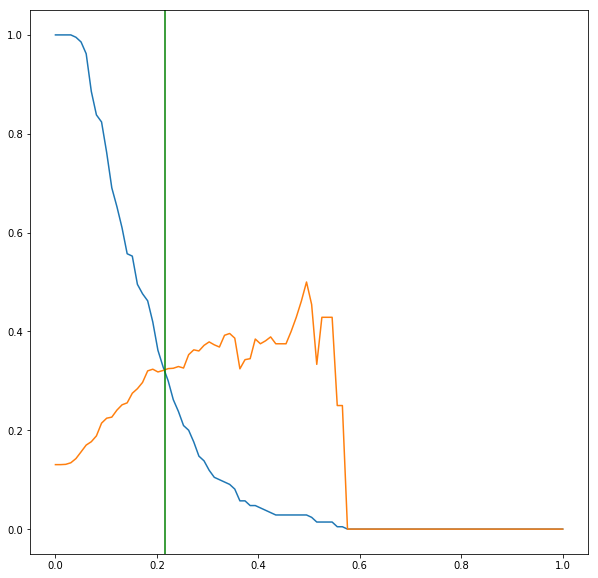

In [85]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ac_n
y2=precision_score_ac_n
plt.plot(x,y)
plt.plot(x,y2)
plt.axvline(0.215, color='g', linestyle='solid');

In [86]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.215
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[1259,  141],
       [ 142,   68]])

In [92]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.90      0.90      0.90      1400
        1.0       0.33      0.32      0.32       210

avg / total       0.82      0.82      0.82      1610



In [77]:
recall_score_ipo_n=[]
precision_score_ipo_n=[]

for i in np.linspace(0,1,100):
    y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ipo_n.append(metrics.precision_score(y1_ipo_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ipo_n.append(metrics.recall_score(y1_ipo_test, y_score))



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

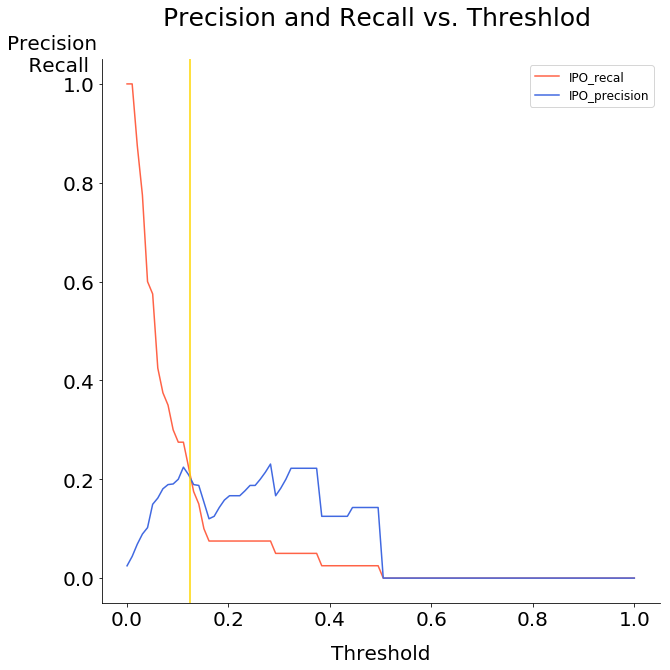

In [193]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ipo_n
y2=precision_score_ipo_n
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='IPO_recal',color='tomato')
plt.plot(x,y2,label='IPO_precision',color='royalblue')
plt.axvline(0.125, color='gold', linestyle='solid')
plt.title("Precision and Recall vs. Threshlod \n", size = 25)
plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Precision     \n Recall    ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 12});

In [90]:
y_ipo_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.125
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1042,  528],
       [  19,   21]])

In [91]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.98      0.66      0.79      1570
        1.0       0.04      0.53      0.07        40

avg / total       0.96      0.66      0.77      1610



In [81]:
y_ipo_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.5
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      1570
        1.0       0.17      0.05      0.08        40

avg / total       0.96      0.97      0.96      1610



In [82]:
cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1560,   10],
       [  38,    2]])

In [93]:
log_ac_n.best_estimator_.coef_

array([[-0.01798859,  0.        , -0.09981589, -0.04777505, -0.03825298,
        -0.00708582, -0.07776639, -0.01124798,  0.04583073,  0.00786432,
        -0.01476311,  0.00428933, -0.01227284, -0.0389094 , -0.0242708 ,
        -0.02818183, -0.00588367, -0.07161678, -0.10813455,  0.03462076,
         0.09168532,  0.01847935, -0.06574595,  0.04792022,  0.        ,
        -0.06573356, -0.01769847, -0.01010762,  0.        , -0.00191505,
        -0.03071854,  0.        ,  0.02682676,  0.00564107, -0.00216363,
         0.        , -0.0192549 ,  0.        ,  0.0271512 ,  0.16828167,
         0.20217926,  0.11917297,  0.07030486,  0.01581336,  0.06839881,
         0.00348595, -0.93375191, -1.24614287, -0.13036916,  0.02246305,
        -0.04568672,  0.        ,  0.        ,  0.        ]])

In [109]:
len(X1.columns)

54

In [145]:

names = X1.columns
coefs = log_ac_n.best_estimator_.coef_[0]
coef=pd.DataFrame({'names':names,'coefs':coefs })

In [154]:
coef['abscoef']=abs(coef['coefs'])

coef=coef.sort_values(by='abscoef',ascending=False)
coef

names     coefs   abscoef
47                          ave_inf_y -1.246143  1.246143
46              first_funding_dayinop -0.933752  0.933752
40                                 CA  0.202179  0.202179
39               category_code[T.web]  0.168282  0.168282
48                   sa_funded_daysop -0.130369  0.130369
41                                 NY  0.119173  0.119173
18           category_code[T.medical] -0.108135  0.108135
2            category_code[T.biotech] -0.099816  0.099816
20            category_code[T.mobile]  0.091685  0.091685
6          category_code[T.ecommerce] -0.077766  0.077766
17     category_code[T.manufacturing] -0.071617  0.071617
42                                 MA  0.070305  0.070305
44                                 WA  0.068399  0.068399
22          category_code[T.nanotech] -0.065746  0.065746
25         category_code[T.nonprofit] -0.065734  0.065734
23   category_code[T.network_hosting]  0.047920  0.047920
3          category_code[T.cleantech] -0.047775  0.047775
8         category_code[T.enterprise]  0.045831  0.045831
50                   ag_funded_daysop -0.045687  0.045687
13            category_code[T.health] -0.038909  0.038909
4         category_code[T.consulting] -0.038253  0.038253
19         category_code[T.messaging]  0.034621  0.034621
30       category_code[T.real_estate] -0.030719  0.030719
15             category_code[T.legal] -0.028182  0.028182
38            category_code[T.travel]  0.027151  0.027151
32          category_code[T.security]  0.026827  0.026827
14       category_code[T.hospitality] -0.024271  0.024271
49           sa_raised_amount_usd_adj  0.022463  0.022463
36            category_code[T.sports] -0.019255  0.019255
21             category_code[T.music]  0.018479  0.018479
0          category_code[T.analytics] -0.017989  0.017989
26             category_code[T.other] -0.017698  0.017698
43                                 TX  0.015813  0.015813
10           category_code[T.finance] -0.014763  0.014763
12          category_code[T.hardware] -0.012273  0.012273
7          category_code[T.education] -0.011248  0.011248
27              category_code[T.pets] -0.010108  0.010108
9            category_code[T.fashion]  0.007864  0.007864
5             category_code[T.design] -0.007086  0.007086
16             category_code[T.local] -0.005884  0.005884
33     category_code[T.semiconductor]  0.005641  0.005641
11       category_code[T.games_video]  0.004289  0.004289
45                      founded_month  0.003486  0.003486
34            category_code[T.social] -0.002164  0.002164
29  category_code[T.public_relations] -0.001915  0.001915
35          category_code[T.software]  0.000000  0.000000
51           ag_raised_amount_usd_adj  0.000000  0.000000
37    category_code[T.transportation]  0.000000  0.000000
31            category_code[T.search]  0.000000  0.000000
52                   cr_funded_daysop  0.000000  0.000000
1         category_code[T.automotive]  0.000000  0.000000
28       category_code[T.photo_video]  0.000000  0.000000
24              category_code[T.news]  0.000000  0.000000
53           cr_raised_amount_usd_adj  0.000000  0.000000

In [155]:
coef2=coef.iloc[:45]
coef2

names     coefs   abscoef
47                          ave_inf_y -1.246143  1.246143
46              first_funding_dayinop -0.933752  0.933752
40                                 CA  0.202179  0.202179
39               category_code[T.web]  0.168282  0.168282
48                   sa_funded_daysop -0.130369  0.130369
41                                 NY  0.119173  0.119173
18           category_code[T.medical] -0.108135  0.108135
2            category_code[T.biotech] -0.099816  0.099816
20            category_code[T.mobile]  0.091685  0.091685
6          category_code[T.ecommerce] -0.077766  0.077766
17     category_code[T.manufacturing] -0.071617  0.071617
42                                 MA  0.070305  0.070305
44                                 WA  0.068399  0.068399
22          category_code[T.nanotech] -0.065746  0.065746
25         category_code[T.nonprofit] -0.065734  0.065734
23   category_code[T.network_hosting]  0.047920  0.047920
3          category_code[T.cleantech] -0.047775  0.047775
8         category_code[T.enterprise]  0.045831  0.045831
50                   ag_funded_daysop -0.045687  0.045687
13            category_code[T.health] -0.038909  0.038909
4         category_code[T.consulting] -0.038253  0.038253
19         category_code[T.messaging]  0.034621  0.034621
30       category_code[T.real_estate] -0.030719  0.030719
15             category_code[T.legal] -0.028182  0.028182
38            category_code[T.travel]  0.027151  0.027151
32          category_code[T.security]  0.026827  0.026827
14       category_code[T.hospitality] -0.024271  0.024271
49           sa_raised_amount_usd_adj  0.022463  0.022463
36            category_code[T.sports] -0.019255  0.019255
21             category_code[T.music]  0.018479  0.018479
0          category_code[T.analytics] -0.017989  0.017989
26             category_code[T.other] -0.017698  0.017698
43                                 TX  0.015813  0.015813
10           category_code[T.finance] -0.014763  0.014763
12          category_code[T.hardware] -0.012273  0.012273
7          category_code[T.education] -0.011248  0.011248
27              category_code[T.pets] -0.010108  0.010108
9            category_code[T.fashion]  0.007864  0.007864
5             category_code[T.design] -0.007086  0.007086
16             category_code[T.local] -0.005884  0.005884
33     category_code[T.semiconductor]  0.005641  0.005641
11       category_code[T.games_video]  0.004289  0.004289
45                      founded_month  0.003486  0.003486
34            category_code[T.social] -0.002164  0.002164
29  category_code[T.public_relations] -0.001915  0.001915

In [156]:
len(coef2)

45

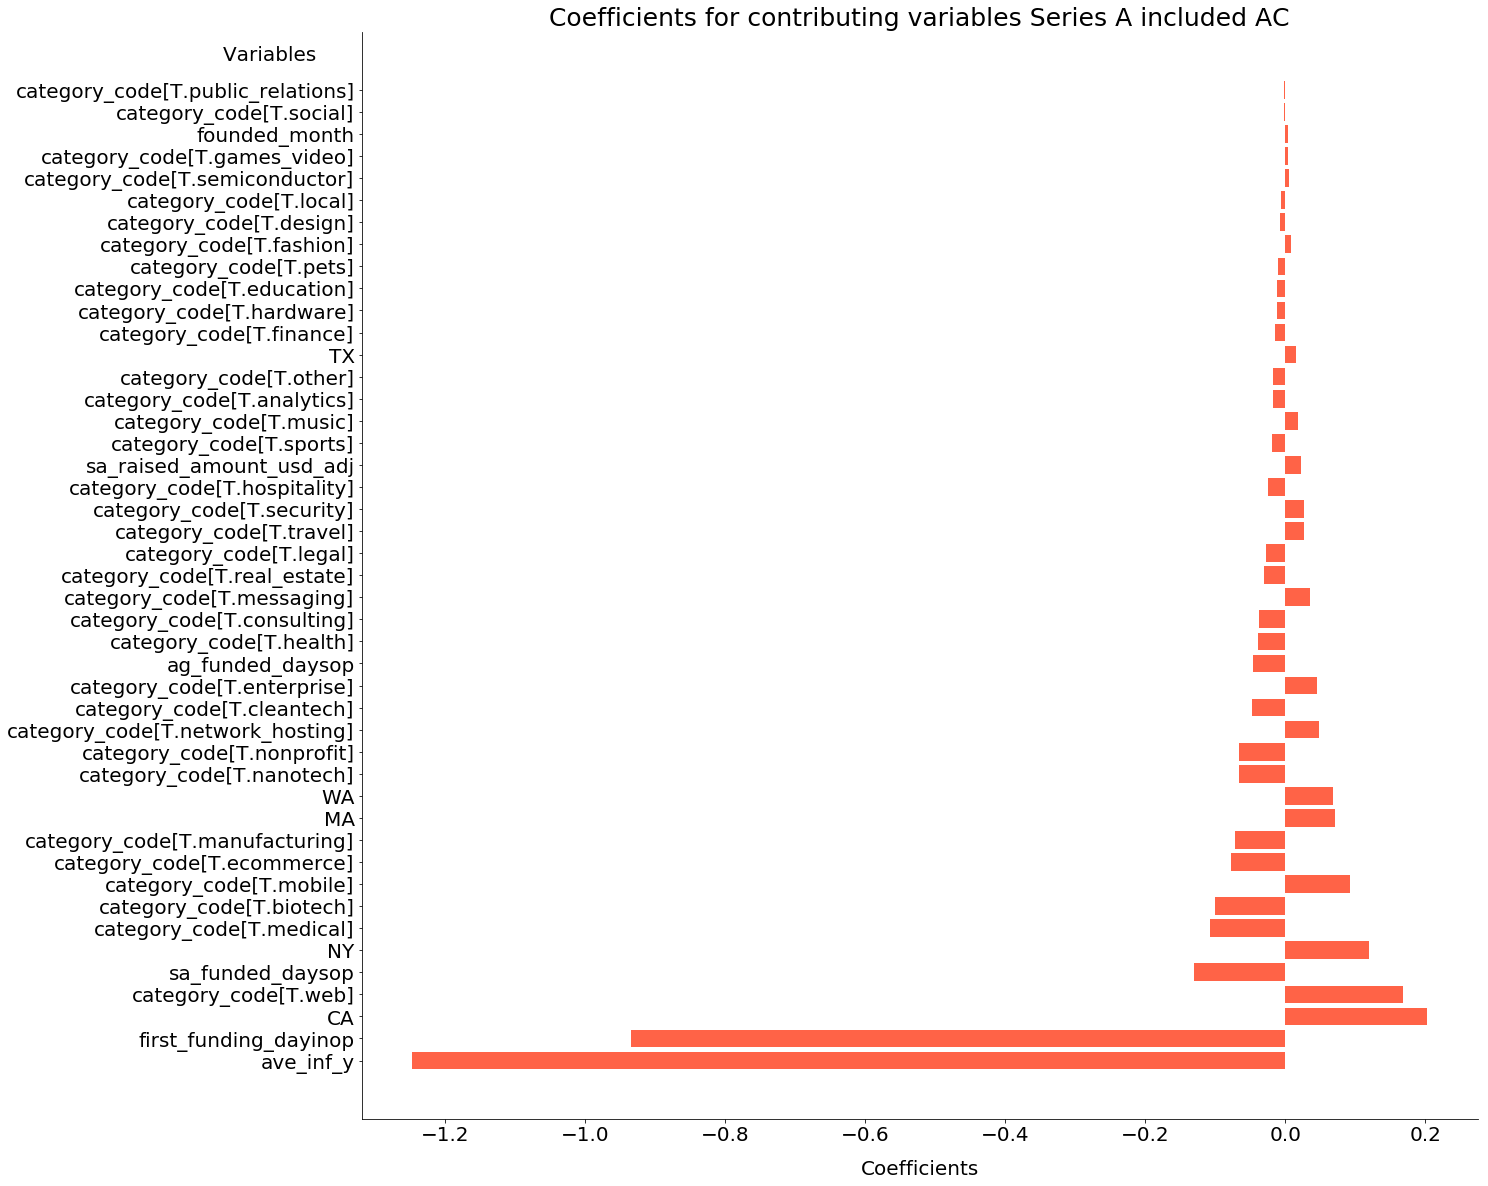

In [183]:
figsize(20,20)
crange = np.arange(len(coef2))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2['coefs'],color='tomato')
plt.yticks(crange, coef2['names'])
ax = gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables Series A included AC", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [197]:
pkl.dump(Model_data_ac, open("Model_data_ac_with_sa.pickle", "wb"))

In [198]:
pkl.dump(Model_data_ipo, open("Model_data_ipo_with_sa.pickle", "wb"))

In [199]:
Model_data_ac.to_csv('Model_data_ac_with_sa.csv')

In [200]:
Model_data_ipo.to_csv('Model_data_ipo_with_sa.csv')